In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import random
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [51]:
data = pd.read_csv("BostonHousing.csv")

In [52]:
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [53]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [54]:
data.dropna(inplace=True)

In [55]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

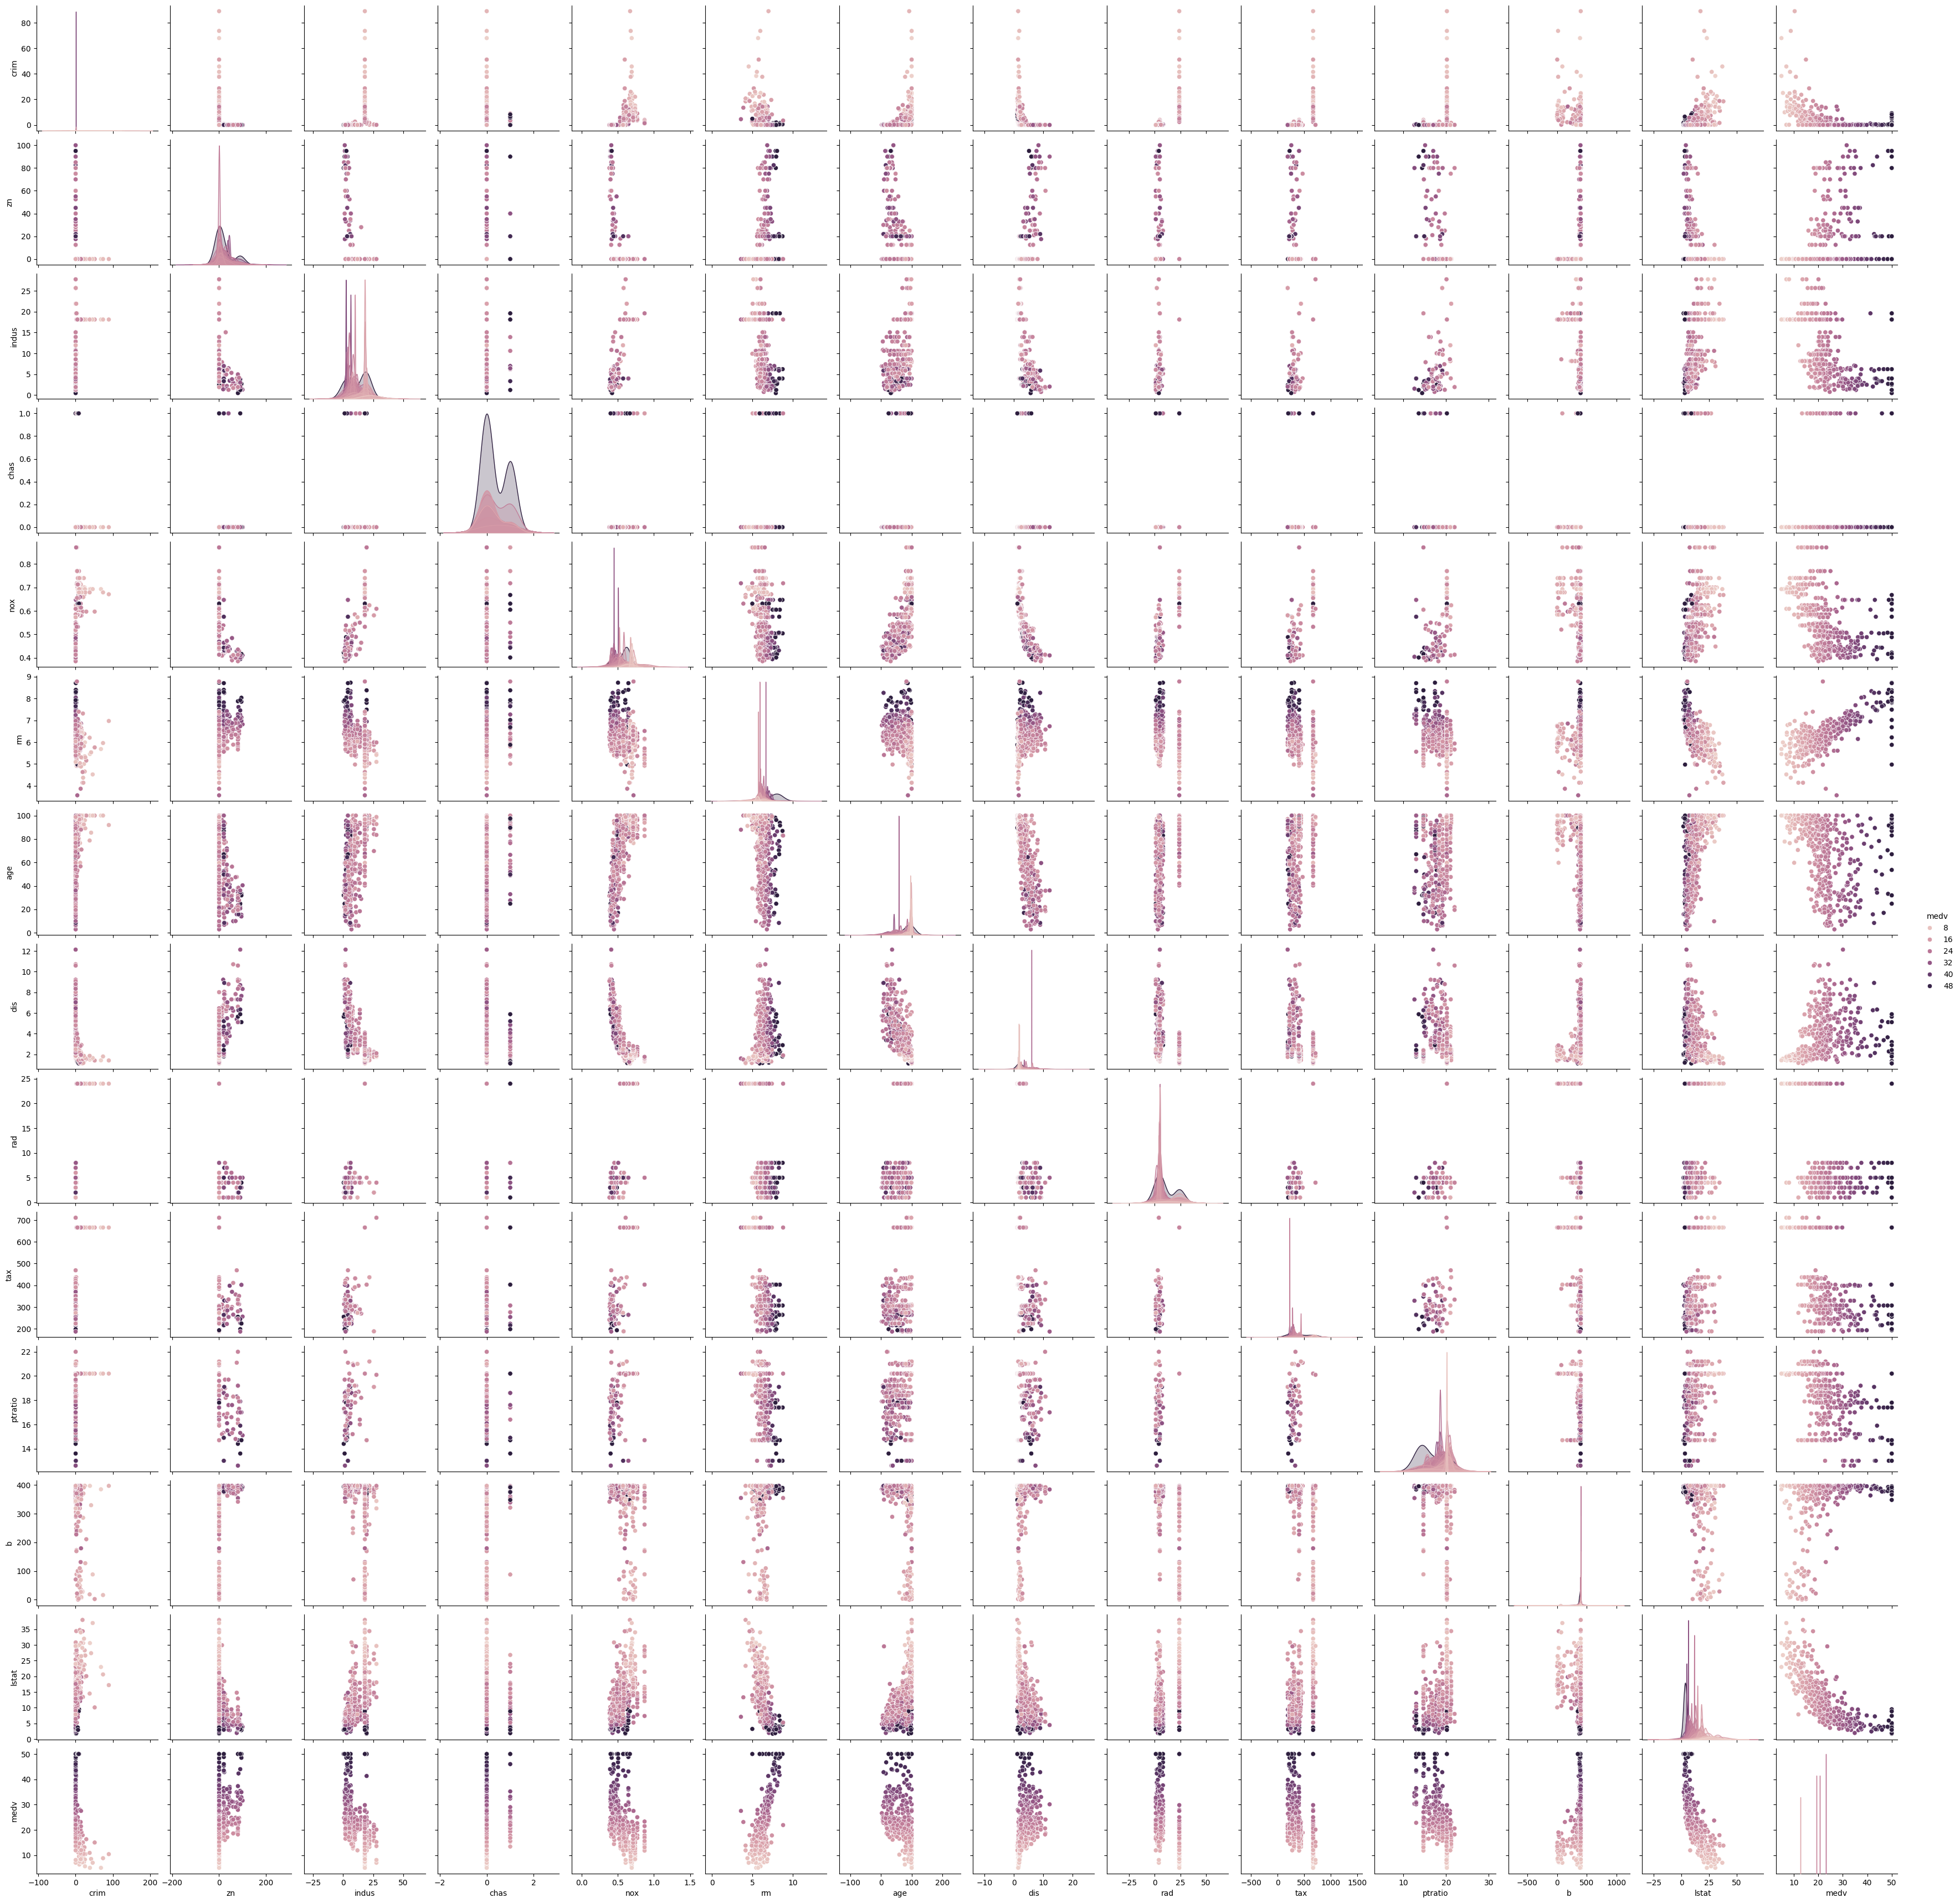

In [56]:
sns.pairplot(data , vars=["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"],hue="medv")


In [57]:
y=data.medv
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 501, dtype: float64

In [58]:
y= data['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 501, dtype: float64

In [59]:
x= data[['age','rm']]
x

,age,rm
0,65.2,6.575
1,78.9,6.421
2,61.1,7.185
3,45.8,6.998
4,54.2,7.147
...,...,...
501,69.1,6.593
502,76.7,6.120
503,91.0,6.976
504,89.3,6.794


In [60]:
class AdalineRegressor:
    def __init__(self):
        pass
    def fit(self, X_train,Y_train):
        #w = (X_train.T*X_train)^-1*X_train.T*Y_train
        self.w = np.matmul(inv(np.matmul(X_train.T, X_train)), np.matmul(X_train.T,Y_train))
        return self.w
    def predict(self, X_train):
        
        # self.w=self.w.reshape(1,2)
        y_pred= np.matmul(self.w.T, X_train.T)
        return y_pred
    def evaluate(self, X_test, Y_test):
        y_pred = np.matmul(X_test, self.w)
        # print("aval",y_pred)
        subtract = np.abs(np.subtract(Y_test, y_pred))
        # print("dovomi",subtract)
        MAE = np.mean(subtract)
        return MAE

In [61]:
model = AdalineRegressor()
w= model.fit(x, y)
w

array([-0.11483439,  4.88134013])

In [62]:
y_pred = model.predict(x)
y_pred

0      24.607609
1      22.282651
2      28.056047
3      28.900203
4      28.662914
         ...    
501    24.247619
502    21.066004
503    23.602299
504    22.909114
505    20.155862
Length: 501, dtype: float64

In [63]:
x

,age,rm
0,65.2,6.575
1,78.9,6.421
2,61.1,7.185
3,45.8,6.998
4,54.2,7.147
...,...,...
501,69.1,6.593
502,76.7,6.120
503,91.0,6.976
504,89.3,6.794


In [64]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 501, dtype: float64

In [65]:
w

array([-0.11483439,  4.88134013])

In [66]:
y_pred

0      24.607609
1      22.282651
2      28.056047
3      28.900203
4      28.662914
         ...    
501    24.247619
502    21.066004
503    23.602299
504    22.909114
505    20.155862
Length: 501, dtype: float64

In [67]:
x['age']

0      65.2
1      78.9
2      61.1
3      45.8
4      54.2
       ... 
501    69.1
502    76.7
503    91.0
504    89.3
505    80.8
Name: age, Length: 501, dtype: float64

In [68]:
# x1=np.array([6.57,65.2])
# pred = model.predict(x1)
# pred

In [69]:
y1= y[0]
y1

np.float64(24.0)

In [70]:
b=model.evaluate(x, y1)
print(b)

4.430919652100387


In [71]:
w[0]


np.float64(-0.11483439264161907)

In [72]:
w[1]

np.float64(4.881340131142389)

Text(0.5, 0, 'medv')

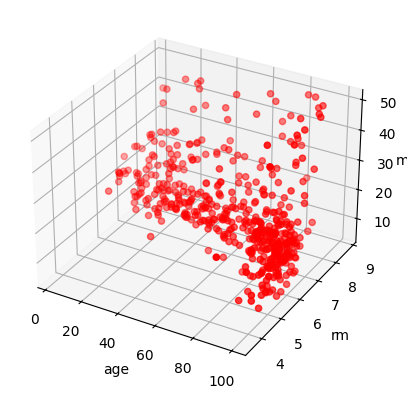

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x['age'],x['rm'], y, color='r')
# ax.plot_surface(w[0], w[1], y_pred, alpha=0.5, color='blue') # Error
ax.set_xlabel('age')
ax.set_ylabel('rm')
ax.set_zlabel('medv')